In [2]:
# Team ID : PNT2022TMID12745
from google.colab import files
file_upload = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# pd.set_option('display.max_columns', 300)
# pd.set_option('display.max_rows', 200)
df = pd.read_csv('Churn_Modelling.csv')
print(df.head())
df.info()

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [16]:
male_df = df[df["Gender"]=="Male"]
male_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0


In [11]:
female_df = df[df["Gender"]=="Female"]
female_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


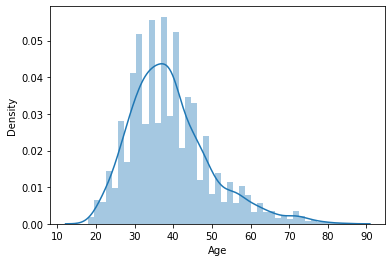

In [13]:
sns.distplot(female_df["Age"])

   CustomerId  CreditScore  Gender    Balance  EstimatedSalary  Age
0    15634602          619  Female       0.00        101348.88   42
1    15647311          608  Female   83807.86        112542.58   41
2    15619304          502  Female  159660.80        113931.57   42
3    15701354          699  Female       0.00         93826.63   39
4    15737888          850  Female  125510.82         79084.10   43
5    15574012          645    Male  113755.78        149756.71   44
6    15592531          822    Male       0.00         10062.80   50
7    15656148          376  Female  115046.74        119346.88   29
8    15792365          501    Male  142051.07         74940.50   44
9    15592389          684    Male  134603.88         71725.73   27


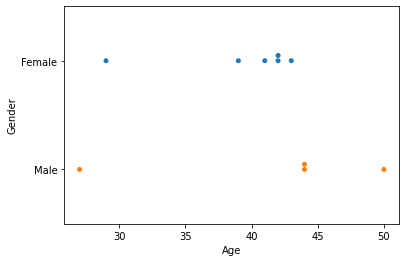

In [29]:
small_df = df[['CustomerId', 'CreditScore', 'Gender', 'Balance', 'EstimatedSalary','Age']]
#smaller_df=small_df[small_df["Gender"]=="Male"]
smaller_df=small_df.head(10)
print(smaller_df)
sns.swarmplot(x="Age", y="Gender", data=smaller_df)

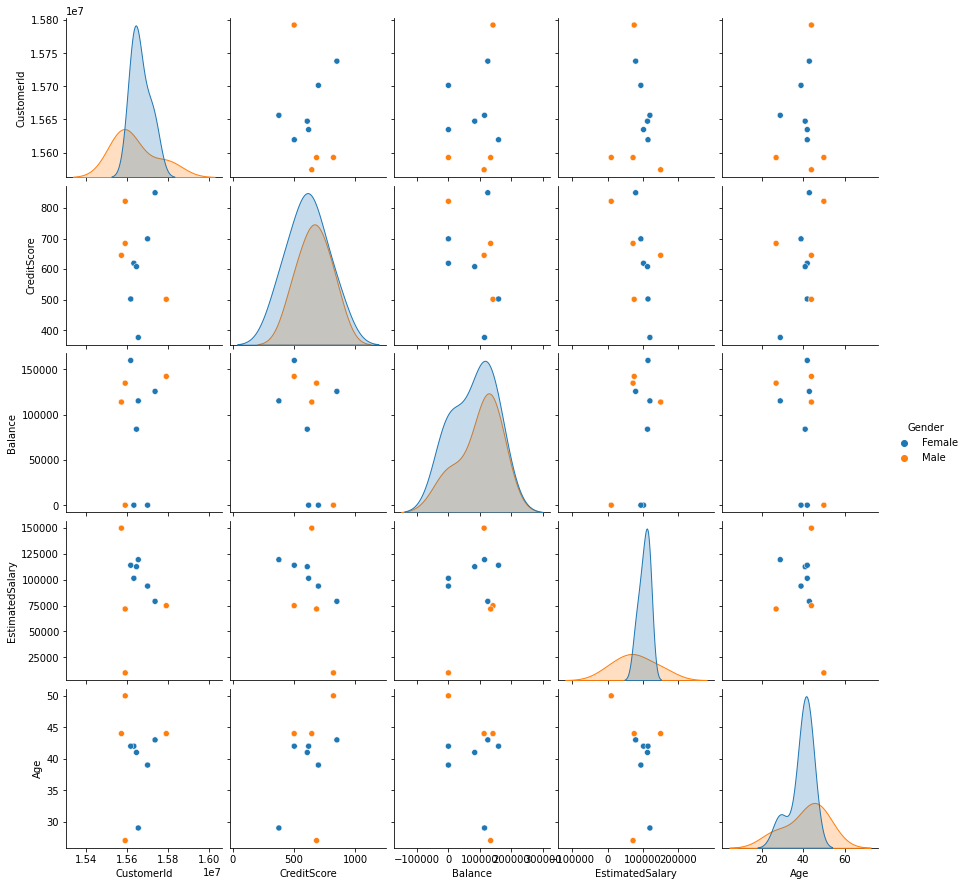

In [32]:
sns.pairplot(smaller_df,hue='Gender')

In [33]:
smaller_df.describe()

,CustomerId,CreditScore,Balance,EstimatedSalary,Age
count,1.000000e+01,10.000000,10.00000,10.000000,10.000000
mean,1.565479e+07,630.600000,87443.69500,92656.638000,40.100000
std,6.993657e+04,145.796052,63488.52679,37499.192483,6.999206
min,1.557401e+07,376.000000,0.00000,10062.800000,27.000000
25%,1.559922e+07,528.500000,20951.96500,75976.400000,39.500000
50%,1.564096e+07,632.000000,114401.26000,97587.755000,42.000000
75%,1.569005e+07,695.250000,132330.61500,113584.322500,43.750000
max,1.579236e+07,850.000000,159660.80000,149756.710000,50.000000


In [42]:
median=df.loc[df["Tenure"]<3,"Tenure"].median()
df.loc[df.Tenure<3,'Tenure']=np.nan
df.fillna(median,inplace=True)
df.describe()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.545700,38.921800,4.949300,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.497932,10.487806,2.953676,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,18.000000,1.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [35]:
df.dtypes


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [36]:
from sklearn.preprocessing import LabelEncoder
#label encoder can't handle missing values
df['Gender'] = df['Gender'].fillna('None')
# Label encode Gender feature
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
# Print sample of dataset
df.head(100)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,15699461,Fiorentini,515,Spain,1,35,10,176273.95,1,0,1,121277.78,0
96,97,15738721,Graham,773,Spain,1,41,9,102827.44,1,0,1,64595.25,0
97,98,15693683,Yuille,814,Germany,1,29,8,97086.40,2,1,1,197276.13,0
98,99,15604348,Allard,710,Spain,1,22,8,0.00,2,0,0,99645.04,0


In [44]:
split_df=df.head(100)
X= split_df.iloc[ : , [0,1,2,3,4,5,6,7,8,9,12]].values

y= split_df.iloc[ : , [10,11,13]].values
print(X)
print(y)

[[1 15634602 'Hargrave' ... 0.0 1 101348.88]
 [2 15647311 'Hill' ... 83807.86 1 112542.58]
 [3 15619304 'Onio' ... 159660.8 3 113931.57]
 ...
 [98 15693683 'Yuille' ... 97086.4 2 197276.13]
 [99 15604348 'Allard' ... 0.0 2 99645.04]
 [100 15633059 'Fanucci' ... 0.0 2 6534.18]]
[[1 1 1]
 [0 1 0]
 [1 0 1]
 [0 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 0]
 [1 0 1]
 [0 1 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 1 0]
 [0 1 0]
 [1 0 1]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [0 1 0]
 [1 1 0]
 [0 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 1]
 [0 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 1]
 [0 1 0]
 [0 1 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 0]
 [0 0 1]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 1]
 [1 0 1]
 [1 1 0]
 [1 0 0]
 [0 0 0]
 [1 0 1]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [0 1 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [

In [45]:
from sklearn.preprocessing import MinMaxScaler
split_df=df.head(100)
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(split_df[["CreditScore","Balance","EstimatedSalary"]]))
df_norm

,0,1,2
0,0.512658,0.000000,0.507625
1,0.489451,0.468939,0.564615
2,0.265823,0.893366,0.571687
3,0.681435,0.000000,0.469328
4,1.000000,0.702283,0.394270
...,...,...,...
95,0.293249,0.986323,0.609088
96,0.837553,0.575361,0.320504
97,0.924051,0.543237,0.996013
98,0.704641,0.000000,0.498951


In [47]:
from sklearn.model_selection import train_test_split
split_df=df.head(100)
X= split_df.iloc[ : , [0,1,2,3,4,5,6,7,8,9,12]]
y= split_df.iloc[ : , [10,11,13]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)
X_train


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
93,94,15640635,Capon,769,France,1,29,8.0,0.00,2,172290.61
16,17,15737452,Romeo,653,Germany,1,58,1.0,132602.88,1,5097.67
73,74,15779052,Ballard,604,Germany,0,25,5.0,157780.84,2,58426.81
54,55,15569590,Yoo,601,Germany,1,42,1.0,98495.72,1,40014.76
95,96,15699461,Fiorentini,515,Spain,1,35,10.0,176273.95,1,121277.78
...,...,...,...,...,...,...,...,...,...,...,...
96,97,15738721,Graham,773,Spain,1,41,9.0,102827.44,1,64595.25
67,68,15641582,Chibugo,735,Germany,1,43,10.0,123180.01,2,196673.28
64,65,15592461,Jackson,603,Germany,1,26,4.0,109166.37,1,92840.67
47,48,15771573,Okagbue,637,Germany,0,39,9.0,137843.80,1,117622.80
